https://www.kaggle.com/datasets/hariharasudhanas/twitter-emoji-prediction/data

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import re
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Try another datasets for code testing
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
# Try another datasets for code testing [Task 4]
from datasets import load_dataset

In [ ]:
# Try another datasets for code testing [Task 4]
other_dataset = load_dataset('ag_news')
df = pd.DataFrame(other_dataset['train'])

In [ ]:
import pandas as pd
df = pd.read_csv("Train.csv").drop(columns=['Unnamed: 0'])
# emoji_mapping = pd.read_csv("Mapping.csv").drop(columns=['Unnamed: 0'])

# Analysis Dataset

## Emoji Prediction Dataset

### Dataset Overview

In [ ]:
# Dataset Statistics
print(f"Number of dat in dataset for training: {df.shape[0]}")
print(f"label in the dataset: {np.unique(df.iloc[:,-1])}")

Number of data in dataset for training: 70000
label in the dataset: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
emoji_mapping

,emoticons,number
0,😜,0
1,📸,1
2,😍,2
3,😂,3
4,😉,4
5,🎄,5
6,📷,6
7,🔥,7
8,😘,8
9,❤,9


In [ ]:
df.iloc[:,-1].value_counts(normalize=True)

Label
9     0.215586
2     0.101086
3     0.097743
7     0.062329
15    0.054900
13    0.046429
16    0.040457
17    0.039300
1     0.037029
11    0.034771
14    0.033457
6     0.029757
8     0.028457
5     0.028243
12    0.027271
4     0.026829
19    0.024929
18    0.024600
10    0.024586
0     0.022243
Name: proportion, dtype: float64

<Axes: ylabel='Label'>

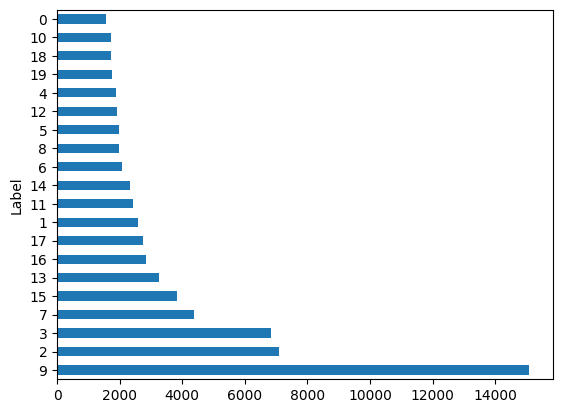

In [ ]:
# Analysis the distribution of label
df.iloc[:,-1].value_counts().plot(kind='barh')


In [ ]:
df.head(5)

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3


### Missing value analysis

In [ ]:
missing_valuue_counts = df.isnull().sum()
print(missing_valuue_counts)

TEXT     0
Label    0
dtype: int64


In [ ]:
df = df.dropna()

### Text statistics

In [ ]:
# Function to count the number of words in a sentence
def count_words(sentence):
    words = str(sentence).split()
    return len(words)

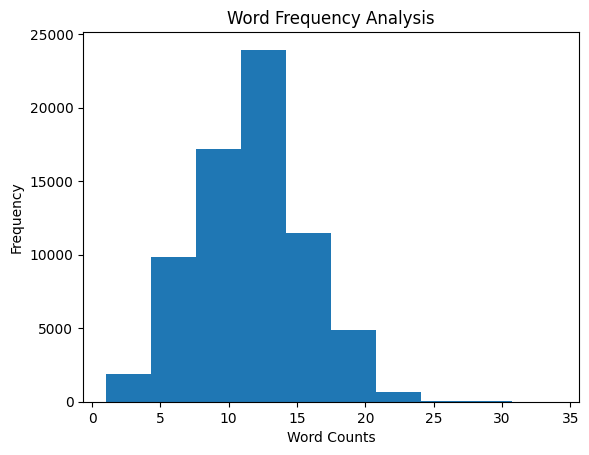

In [ ]:
word_count = df.iloc[:,0].apply(lambda x: count_words(x))
plt.hist(word_count)
plt.title('Word Frequency Analysis')
plt.xlabel('Word Counts')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# def label2int(label):
#   if label == "positive":
#     return 1
#   else:
#     return 0

## Other Dataset [Task 4]

### Dataset Overview

In [ ]:
print(f"Number of data in dataset for training: {other_dataset_df.shape[0]}")
print(f"label in the dataset: {np.unique(other_dataset_df.iloc[:,-1])}")

Number of data in dataset for training: 120000
label in the dataset: [0 1 2 3]


<Axes: ylabel='label'>

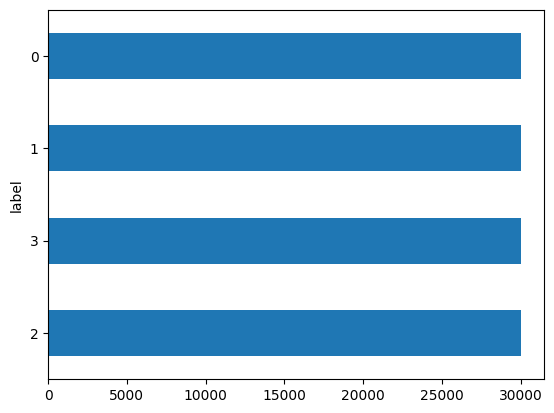

In [ ]:
df.iloc[:,-1].value_counts().plot(kind='barh')

In [ ]:
# Try another datasets for code testing [Task 4]
df.head(5)

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


### Text statistics

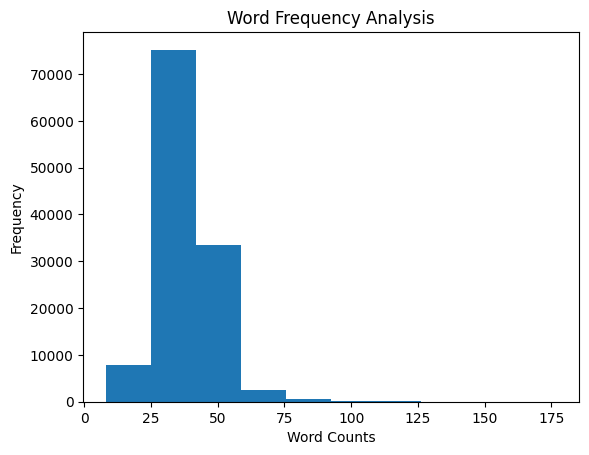

In [ ]:
word_count = df.iloc[:,0].apply(lambda x: count_words(x))
plt.hist(word_count)
plt.title('Word Frequency Analysis')
plt.xlabel('Word Counts')
plt.ylabel('Frequency')
plt.show()

# Dataset Modification

## UnderSampling - For Top 5 Class

In [ ]:
top_5_labels = df.iloc[:,-1].value_counts().head(5).index.tolist()

In [ ]:
top_5_labels

[9, 2, 3, 7, 15]

In [ ]:
filter_df = pd.DataFrame(df[df.iloc[:,-1].isin(top_5_labels)])

In [ ]:
text_df = pd.DataFrame(filter_df.iloc[:,0])
label_df = pd.DataFrame(filter_df.iloc[:,-1])

In [ ]:
# Choose the subset of data for training and test dataset
import numpy as np
from sklearn.model_selection import train_test_split
def subset_of_data(dfx, dfy):
  unique_classes = np.unique(dfy)
  balanced_data = []
  balanced_label = []
  for label in unique_classes:
    class_indices = np.where(dfy == label)[0]
    balanced_data.append(dfx.iloc[class_indices[:3800]])
    balanced_label.append(dfy.iloc[class_indices[:3800]])
  balanced_data = pd.concat(balanced_data)
  balanced_label = pd.concat(balanced_label)
  return balanced_data, balanced_label

dataX, dataY = subset_of_data(text_df, label_df)
# print(dataY.value_counts())
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, stratify=dataY, random_state=4211)
# print(y_train.value_counts())

## UnderSampling - For All 20 Class

In [ ]:
text_df = pd.DataFrame(df.iloc[:,0])
label_df = pd.DataFrame(df.iloc[:,-1])

In [ ]:
# Choose the subset of data for training and test dataset
import numpy as np
from sklearn.model_selection import train_test_split
def subset_of_data(dfx, dfy):
  unique_classes = np.unique(dfy)
  balanced_data = []
  balanced_label = []
  for label in unique_classes:
    class_indices = np.where(dfy == label)[0]
    balanced_data.append(dfx.iloc[class_indices[:1500]])
    balanced_label.append(dfy.iloc[class_indices[:1500]])
  balanced_data = pd.concat(balanced_data)
  balanced_label = pd.concat(balanced_label)
  return balanced_data, balanced_label

dataX, dataY = subset_of_data(text_df, label_df)
# print(dataY.value_counts())
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, stratify=dataY, random_state=4211)
# print(y_train.value_counts())

## OverSampling - SMOTE [Please refer to the code after Text Preprocessing]

# Text Preprocessing

## Convert to Lowercase

In [ ]:
#Example
text = X_train["TEXT"].iloc[0]
clean_text = text.lower()
print(f"Before: {text}")
print(f"After: {clean_text}")

Before: Squad back together #tistheseason @ Toms River High School East

After: squad back together #tistheseason @ toms river high school east



## Removal of URLs

In [ ]:
# removal of URLs
def remove_url(text):
  return re.sub(r"https?://\S+|www\.\S+","", text)

In [ ]:
# Example
example = "https://hkust.edu.hk/ is a testing URL"
print(f"Before: {example}")
print(f"After: {remove_url(example)}")

Before: https://hkust.edu.hk/ is a testing URL
After:  is a testing URL


## Removal of Punctuations

In [ ]:
# removal of Punctuations
import string
def remove_punctuations(text):
  punctuations = string.punctuation
  return str(text).translate(str.maketrans("","",punctuations))

In [ ]:
#Example
print(f"Before: {clean_text}")
clean_text = remove_punctuations(clean_text)
print(f"After: {clean_text}")

Before: squad back together #tistheseason @ toms river high school east

After: squad back together tistheseason  toms river high school east



## Removal of Special Characters

In [ ]:
# removal of special characters
import re
def remove_spl_chars(text):
  text = re.sub("[^a-zA-Z]", " ", str(text))
  text = re.sub("\s+"," ", str(text))
  return text

In [ ]:
#Example
example = "I am 3 years old "
print(f"Before: {example}")
print(f"After: {remove_spl_chars(example)}")

Before: I am 3 years old 
After: I am years old 


## Removal of Stopwords

In [ ]:
# removal of stopwords
STOPWORDS = set(nltk.corpus.stopwords.words('english'))
print(STOPWORDS)
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

{'when', 'hasn', 'there', 'who', 'your', 'and', 'from', 'yourselves', 'it', 'were', 'if', 'the', 'couldn', 'mustn', 'o', 'too', 'you', 'as', 'my', 'most', 'with', 'wasn', 'now', "shouldn't", 'not', 'do', 're', "haven't", 'same', 'haven', 'myself', 'of', 'under', 'nor', 'by', 'between', 'those', 'ours', 'be', 'd', 'them', 'because', 'what', "hadn't", 'about', 'here', 'which', 'won', 'after', 'they', 'y', "hasn't", "weren't", 'each', "isn't", 'isn', "don't", 'itself', "won't", "aren't", 'again', 'this', 'are', "you'd", 'during', 'just', 'being', 'out', 'their', 'm', 'why', 'through', 'our', 'has', "you'll", 'shan', 'in', 'other', 'she', 'doing', 'ma', 'was', "needn't", 'at', 'before', 'that', 'an', "that'll", 'i', 'his', "wouldn't", 'him', 'having', 't', 'should', 'such', "she's", 'he', 'some', 'hadn', "you've", "mustn't", 'mightn', 'off', 'while', 'wouldn', "mightn't", 'these', 'theirs', 'below', 'very', 'than', 'ourselves', 'we', 'yourself', 'her', 'ain', 'themselves', 'how', 'hers', '

In [ ]:
#Example
example = "I am happy "
print(f"Before: {example}")
print(f"After: {remove_stopwords(example)}")

Before: I am happy 
After: I happy


## Removal of Words

In [ ]:
text_df["clean_TEXT"] = text_df["TEXT"].str.lower()
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_punctuations(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_spl_chars(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_stopwords(x))

In [ ]:
from collections import Counter
word_count = Counter()
for text in text_df["clean_TEXT"]:
  for word in text.split():
    word_count[word] += 1

In [ ]:
word_count.most_common(10)
FREQUENT_WORDS = set(word for (word,wc) in word_count.most_common(10))
RARE_WORDS = set(word for (word,wc) in word_count.most_common()[:-10:-1])

print(FREQUENT_WORDS)
print(RARE_WORDS)

{'new', 'night', 'happy', 'amp', 'love', 'time', 'one', 'york', 'user', 'day'}
{'bubie', 'galina', 'charlestonlaffin', 'consultant', 'gali', 'biedenharn', 'liberalscumbags', 'asurams', 'paysonbookfestival'}


### Removal of Freq Words

In [ ]:
def remove_freq_words(text):
  return " ".join([word for word in text.split() if word not in FREQUENT_WORDS])

### Removal of Rare Words

In [ ]:
# removal of rare words
def remove_rare_words(text):
  return " ".join([word for word in text.split() if word not in RARE_WORDS])

## Stemming

In [ ]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
# Example
example = "programming programmer programs"
print(f"Before: {example}")
print(f"After: {stem_words(example)}")

Before: programming programmer programs
After: program programm program


## Lemmatization & POS Tagging

In [ ]:
# Lemmatization & POS Tagging
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N": nltk.corpus.wordnet.NOUN, "V": nltk.corpus.wordnet.VERB, "J":nltk.corpus.wordnet.ADJ, "R": nltk.corpus.wordnet.ADV}

def lemmatize_words(text):
  pos_text = pos_tag(str(text).split())
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], nltk.corpus.wordnet.NOUN)) for word, pos in pos_text])


In [ ]:
# Example
example = "amusing"
print(f"Before: {example}")
print(f"After: {stem_words(example)}")

Before: amusing
After: amus


## Spelling correction

In [ ]:
# spelling correction
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.5 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()

def correct_spellings(text):
  # print(text)
  corrected_text = []
  misspelled_text = spell.unknown(text.split())
  print(misspelled_text)
  for word in text.split():
    if word in misspelled_text:
      print(spell.correction(word))
      if spell.correction(word) is not None:
        corrected_text.append(spell.correction(word))
    else:
      corrected_text.append(word)
  return " ".join(corrected_text)

In [ ]:
# Example
example = "natur is a beuty"
print(f"Before: {example}")
print(f"After: {correct_spellings(example)}")

Before: natur is a beuty
After: nature is a beauty


In [ ]:
# Testing on dataset
text_df["clean_TEXT"] = text_df["TEXT"].str.lower()
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_punctuations(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_spl_chars(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_stopwords(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: lemmatize_words(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: correct_spellings(x))

{'miami', 'photobomb', 'mcgar', 'vacationwasted'}
None
None
car
mama
{'wynwood', 'itwas'}
dyewood
dyewood
twas
dyewood
{'th'}
the
{'htx'}
hex
{'ive', 'rt'}
it
give
{'im'}
i
{'santa', 'christmas'}
christian
manta
{'lazznation', 'toronto', 'weston', 'westenders'}
westerners
lamination
teston
pronto
{'akron'}
apron
{'saturday', 'fl', 'miami', 'ave'}
sturdy
have
mama
fly
set()
{'hellofromthemagictavern', 'javits'}
None
davits
{'addy', 'wscatlanta', 'znation'}
None
None
nation
add
{'sausalito', 'california', 'th', 'yall'}
the
all
causality
californium


KeyboardInterrupt: 

## Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
text_df["clean_token_TEXT"] = text_df["clean_TEXT"].apply(lambda x: word_tokenize(x))

In [ ]:
text_df["clean_token_TEXT"]

0        [vacation, wasted, vacation, photobomb, tired,...
1        [oh, wynwood, funny, user, wynwood, art, itwas...
2        [friends, since, th, grade, look, us, followin...
3        [looks, like, someone, loves, unconditionally,...
4        [rt, user, white, family, invited, black, barb...
                               ...                        
69995    [yes, call, galina, bubie, go, follow, beautif...
69996           [sea, seattle, ballard, seafood, festival]
69997    [one, daughters, wearing, asks, ice, cream, wo...
69998    [guess, whoop, people, homecoming, asurams, at...
69999    [love, robbie, heritage, memorial, cemetery, llc]
Name: clean_token_TEXT, Length: 70000, dtype: object

# Word Embedding

## Word2Index for Embedding Layer

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def word_to_index_mapping(word_list):
  flatten_word_list = [word for sublist in word_list for word in sublist]
  # print(flatten_word_list)
  unique_word_list = list(set(flatten_word_list))
  word_to_index = {}
  word_to_index["PAD"] = 0
  word_to_index["UNK"] = 1
  for i, word in enumerate(unique_word_list):
    word_to_index[word] = i+2
  return word_to_index
def indexing_word_sequence(word_list, word_to_index, max_token_len = 20):
  indexed_word_list = [[word_to_index.get(word, word_to_index.get("UNK")) for word in sublist] for sublist in word_list]
  padded_word_list = pad_sequences(indexed_word_list, maxlen=max_token_len, padding='post')
  return padded_word_list

## GloVe

In [ ]:
! pip install --upgrade gensim

In [ ]:
import gensim.downloader as api

In [ ]:
info = api.info()
for model_name, model_data in sorted(info['models'].items()):
  print(
      '%s (%d records): %s' %(
          model_name,
          model_data.get('num_records', -1),
          model_data['description'][:80] + '...'
      )
  )

__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors of the movie matrix....
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets, 27B tokens, 1.2M vocab, uncased (https:...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https:/...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https:/...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https:/...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2014 + Gigaword 5.6B tokens, 400K vocab, ...
glove-wik

In [ ]:
glove = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
print(glove)

KeyedVectors<vector_size=50, 1193514 keys>


In [ ]:
def get_emb_data(data, max_token_len):
    embedding_data = np.zeros((len(data), max_token_len, 50))  # from glove-twitter-50

    for idx in range(len(data)):
      if idx < max_token_len:
        i = 0
        for word in data.iloc[idx]:
          if word in glove:
              embedding_data[idx][i] = glove[word]
          i += 1

    return embedding_data

In [ ]:
X_train["clean_TEXT"] = X_train["TEXT"].str.lower()
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_url(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_punctuations(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_spl_chars(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_stopwords(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: lemmatize_words(x))

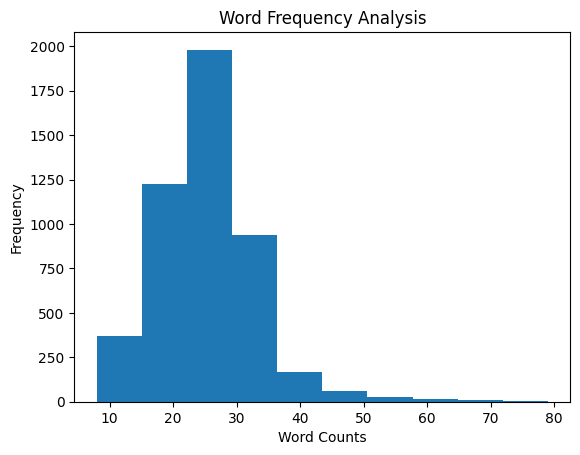

In [ ]:
# Other Dataset
word_count = X_train["clean_TEXT"].apply(lambda x: count_words(x))
plt.hist(word_count)
plt.title('Word Frequency Analysis')
plt.xlabel('Word Counts')
plt.ylabel('Frequency')
plt.show()

# Apply Text Preprocessing

### if use Embedding Layer for word embedding

In [ ]:
# Text preprocessing ready for Oversampling + for word embedding with Corpus [Data]
text_df["clean_TEXT"] = text_df["TEXT"].str.lower()
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_url(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_punctuations(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_spl_chars(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_stopwords(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: lemmatize_words(x))
text_df["clean_token_TEXT"] = text_df["clean_TEXT"].apply(lambda x: word_tokenize(x))
word_index_dict = word_to_index_mapping(text_df["clean_token_TEXT"])
word_index_list = indexing_word_sequence(text_df["clean_token_TEXT"],word_index_dict)

In [ ]:
# Text preprocessing ready for Oversampling + for word embedding with Corpus [Label]
from tensorflow.keras.utils import to_categorical
label_df = to_categorical(label_df)

In [ ]:
# Text preprocessing after Undersampling + for word embedding with Corpus [Training Data]
X_train["clean_TEXT"] = X_train["TEXT"].str.lower()
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_url(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_punctuations(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_spl_chars(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_stopwords(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: lemmatize_words(x))
# X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: stem_words(x))
X_train["clean_token_TEXT"] = X_train["clean_TEXT"].apply(lambda x: word_tokenize(x))
word_index_dict = word_to_index_mapping(X_train["clean_token_TEXT"])
word_index_list = indexing_word_sequence(X_train["clean_token_TEXT"],word_index_dict)

In [ ]:
word_index_list.shape

(4800, 150)

In [ ]:
# Example of tokenized data
X_train["clean_token_TEXT"]

32370    [squad, back, together, tistheseason, tom, riv...
8915     [sunday, morning, new, coffee, friend, brookly...
33961              [ivoted, vermilion, county, courthouse]
11742      [shout, america, land, free, home, brave, user]
48624                             [new, downtown, detroit]
                               ...                        
37169    [girl, wan, na, sun, emerald, isle, north, car...
5601         [thanks, b, davis, p, sawyer, tree, hill, nc]
4341                                               [bitch]
36796                        [happy, place, lake, tulloch]
53369    [everyone, need, break, hard, work, even, spri...
Name: clean_token_TEXT, Length: 24000, dtype: object

In [ ]:
word_index_dict

{'PAD': 0,
 'UNK': 1,
 'lakersfan': 2,
 'saranac': 3,
 'muchsauce': 4,
 'spur': 5,
 'bmotorsport': 6,
 'greencastle': 7,
 'cortlandt': 8,
 'bada': 9,
 'fell': 10,
 'palmsmorongo': 11,
 'newtonhairsalon': 12,
 'boutiqueboss': 13,
 'interns': 14,
 'tube': 15,
 'leftlane': 16,
 'yearbook': 17,
 'crushed': 18,
 'pictureilfordhp': 19,
 'creepin': 20,
 'latinx': 21,
 'mucccch': 22,
 'df': 23,
 'dreamcar': 24,
 'smokeshop': 25,
 'coffeecoolata': 26,
 'louisehay': 27,
 'woodson': 28,
 'lupusawareness': 29,
 'thereefatlantis': 30,
 'catonr': 31,
 'alayah': 32,
 'ivyautumn': 33,
 'creamy': 34,
 'ptk': 35,
 'capitolpdx': 36,
 'apenas': 37,
 'stratosphere': 38,
 'victoriabc': 39,
 'sinterklaas': 40,
 'eventlife': 41,
 'dumbbell': 42,
 'imax': 43,
 'fanny': 44,
 'mosa': 45,
 'vanderbilt': 46,
 'sbcc': 47,
 'tuesdayness': 48,
 'butte': 49,
 'aclfest': 50,
 'quicker': 51,
 'swimsuit': 52,
 'homieparty': 53,
 'friendsgiving': 54,
 'teavana': 55,
 'opalcreek': 56,
 'bubba': 57,
 'saxon': 58,
 'tattedby

In [ ]:
# Text preprocessing after Undersampling + for word embedding with Corpus [Testing Data]
X_test["clean_TEXT"] = X_test["TEXT"].str.lower()
X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: remove_url(x))
X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: remove_punctuations(x))
X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: remove_spl_chars(x))
X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: remove_stopwords(x))
X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: lemmatize_words(x))
# X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: stem_words(x))
X_test["clean_token_TEXT"] = X_test["clean_TEXT"].apply(lambda x: word_tokenize(x))
word_index_list_TEST = indexing_word_sequence(X_test["clean_token_TEXT"],word_index_dict)

In [ ]:
# Text preprocessing after Undersampling + for word embedding with Corpus [Other Dataset Training Data - ag_news] [Task 4]
X_train["clean_TEXT"] = X_train["text"].str.lower()
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_url(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_punctuations(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_spl_chars(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: remove_stopwords(x))
X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: lemmatize_words(x))
# X_train["clean_TEXT"] = X_train["clean_TEXT"].apply(lambda x: stem_words(x))
X_train["clean_token_TEXT"] = X_train["clean_TEXT"].apply(lambda x: word_tokenize(x))
word_index_dict = word_to_index_mapping(X_train["clean_token_TEXT"])
word_index_list = indexing_word_sequence(X_train["clean_token_TEXT"],word_index_dict,75)

In [ ]:
# Text preprocessing after Undersampling + for word embedding with Corpus [Other Dataset Testing Data - ag_news] [Task 4]
X_test["clean_TEXT"] = X_test["text"].str.lower()
X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: remove_url(x))
X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: remove_punctuations(x))
X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: remove_spl_chars(x))
X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: remove_stopwords(x))
X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: lemmatize_words(x))
# X_test["clean_TEXT"] = X_test["clean_TEXT"].apply(lambda x: stem_words(x))
X_test["clean_token_TEXT"] = X_test["clean_TEXT"].apply(lambda x: word_tokenize(x))
word_index_list_TEST = indexing_word_sequence(X_test["clean_token_TEXT"],word_index_dict, 75)

In [ ]:
# Text preprocessing after Undersampling + for word embedding with Corpus [Label]
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape[1]

20

In [ ]:
# def preprocessing_in_one(data):
#   clean_text = data["TEXT"].str.lower()
#   clean_text = clean_text.apply(lambda x: remove_stopwords(remove_spl_chars(remove_punctuations(x))))

#   tokenized_word = clean_text.apply(lambda x: word_tokenize(x))
#   max_token_len = get_max_token_len(tokenized_word)
#   emb_data = get_emb_data(tokenized_word, max_token_len)
#   return emb_data, max_token_len

In [ ]:
display(word_index_list.shape)

(24000, 20)

### if use GloVe for word embedding

In [ ]:
# Text preprocessing ready for Oversampling + for word embedding with GloVe [Data]
text_df["clean_TEXT"] = text_df["TEXT"].str.lower()
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_url(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_punctuations(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_spl_chars(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: remove_stopwords(x))
text_df["clean_TEXT"] = text_df["clean_TEXT"].apply(lambda x: lemmatize_words(x))
text_df["clean_token_TEXT"] = text_df["clean_TEXT"].apply(lambda x: word_tokenize(x))
max_token_len = 20
X_temb = get_emb_data(text_df["clean_token_TEXT"], max_token_len)

#  Oversampling - SMOTE

## Word Embedding with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# if word embedding with GloVe
# SMOTE only accept the 2D data, therefore reshape is required if the token has been converted to be dense vector
X_smote = X_temb.reshape(-1, 1000)

In [ ]:
# if word embedding with embedding layer
X_smote = word_index_list

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_smote, np_array)

In [ ]:
# if word embedding with GloVe
# we have to convert the 2D data back to 3D data
X = X.reshape(-1, 20, 50)

((301820, 20), (301820, 20))

## Split dataset after SMOTE

In [ ]:
X.shape, y.shape

((301820, 20), (301820, 20))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, label_df, test_size=0.2, stratify=label_df, random_state=4211)

# Task 1 - Training Result with Unidirectional vs Bidirectional Architecture

## Unidirectional RNN Model [GRU] for All 20 labels

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, SimpleRNN, Bidirectional

# def RNN_classifier(input_shape, num_classes):
model = Sequential()

model.add(Embedding(input_dim=len(word_index_dict),output_dim=64,input_length=20))
model.add(GRU(units=128, return_sequences=True))
model.add(GRU(units=64))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=20, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            2116288   
                                                                 
 gru (GRU)                   (None, 20, 128)           74496     
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 20)               

### Training

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(word_index_list, y_train, epochs=10, batch_size=64, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

Epoch 1/10
300/300 [==============================] - 40s 107ms/step - loss: 2.9966 - accuracy: 0.0511 - val_loss: 2.9968 - val_accuracy: 0.0490
Epoch 2/10
300/300 [==============================] - 23s 76ms/step - loss: 2.9962 - accuracy: 0.0494 - val_loss: 2.9964 - val_accuracy: 0.0463
Epoch 3/10
300/300 [==============================] - 23s 78ms/step - loss: 2.9959 - accuracy: 0.0510 - val_loss: 2.9966 - val_accuracy: 0.0456
Epoch 4/10
300/300 [==============================] - 24s 81ms/step - loss: 2.9207 - accuracy: 0.0847 - val_loss: 2.8283 - val_accuracy: 0.1098
Epoch 5/10
300/300 [==============================] - 24s 81ms/step - loss: 2.7750 - accuracy: 0.1249 - val_loss: 2.7684 - val_accuracy: 0.1340
Epoch 6/10
300/300 [==============================] - 28s 92ms/step - loss: 2.5553 - accuracy: 0.1676 - val_loss: 2.8414 - val_accuracy: 0.1419
Epoch 7/10
300/300 [==============================] - 24s 80ms/step - loss: 2.2809 - accuracy: 0.2289 - val_loss: 2.9673 - val_accuracy

### Evaluation

In [ ]:
loss, accuracy = model.evaluate(word_index_list_TEST, y_test)

188/188 [==============================] - 2s 9ms/step - loss: 2.7912 - accuracy: 0.1280


In [ ]:
prediction = np.argmax(model.predict(word_index_list_TEST), axis=1)

188/188 [==============================] - 3s 12ms/step


In [ ]:
from sklearn.metrics import f1_score
f1_scores = f1_score(np.argmax(y_test, axis=1), prediction, average=None)
for label, f1 in enumerate(f1_scores):
  print(f"F1-score for label {label}: {f1}")

F1-score for label 0: 0.0
F1-score for label 1: 0.19193324061196107
F1-score for label 2: 0.1258741258741259
F1-score for label 3: 0.10482430017867779
F1-score for label 4: 0.0
F1-score for label 5: 0.49630411826821536
F1-score for label 6: 0.0
F1-score for label 7: 0.10869565217391305
F1-score for label 8: 0.0
F1-score for label 9: 0.0
F1-score for label 10: 0.02610966057441253
F1-score for label 11: 0.26046511627906976
F1-score for label 12: 0.017045454545454548
F1-score for label 13: 0.08198757763975156
F1-score for label 14: 0.011428571428571429
F1-score for label 15: 0.006622516556291392
F1-score for label 16: 0.006079027355623101
F1-score for label 17: 0.0
F1-score for label 18: 0.006410256410256411
F1-score for label 19: 0.0


In [ ]:
report = classification_report(np.argmax(y_test, axis =1), prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       300\n           1       0.16      0.23      0.19       300\n           2       0.08      0.33      0.13       300\n           3       0.06      0.29      0.10       300\n           4       0.00      0.00      0.00       300\n           5       0.36      0.78      0.50       300\n           6       0.00      0.00      0.00       300\n           7       0.10      0.12      0.11       300\n           8       0.00      0.00      0.00       300\n           9       0.00      0.00      0.00       300\n          10       0.06      0.02      0.03       300\n          11       0.16      0.65      0.26       300\n          12       0.06      0.01      0.02       300\n          13       0.07      0.11      0.08       300\n          14       0.04      0.01      0.01       300\n          15       0.50      0.00      0.01       300\n          16       0.03      0.00      0.01       300\n       

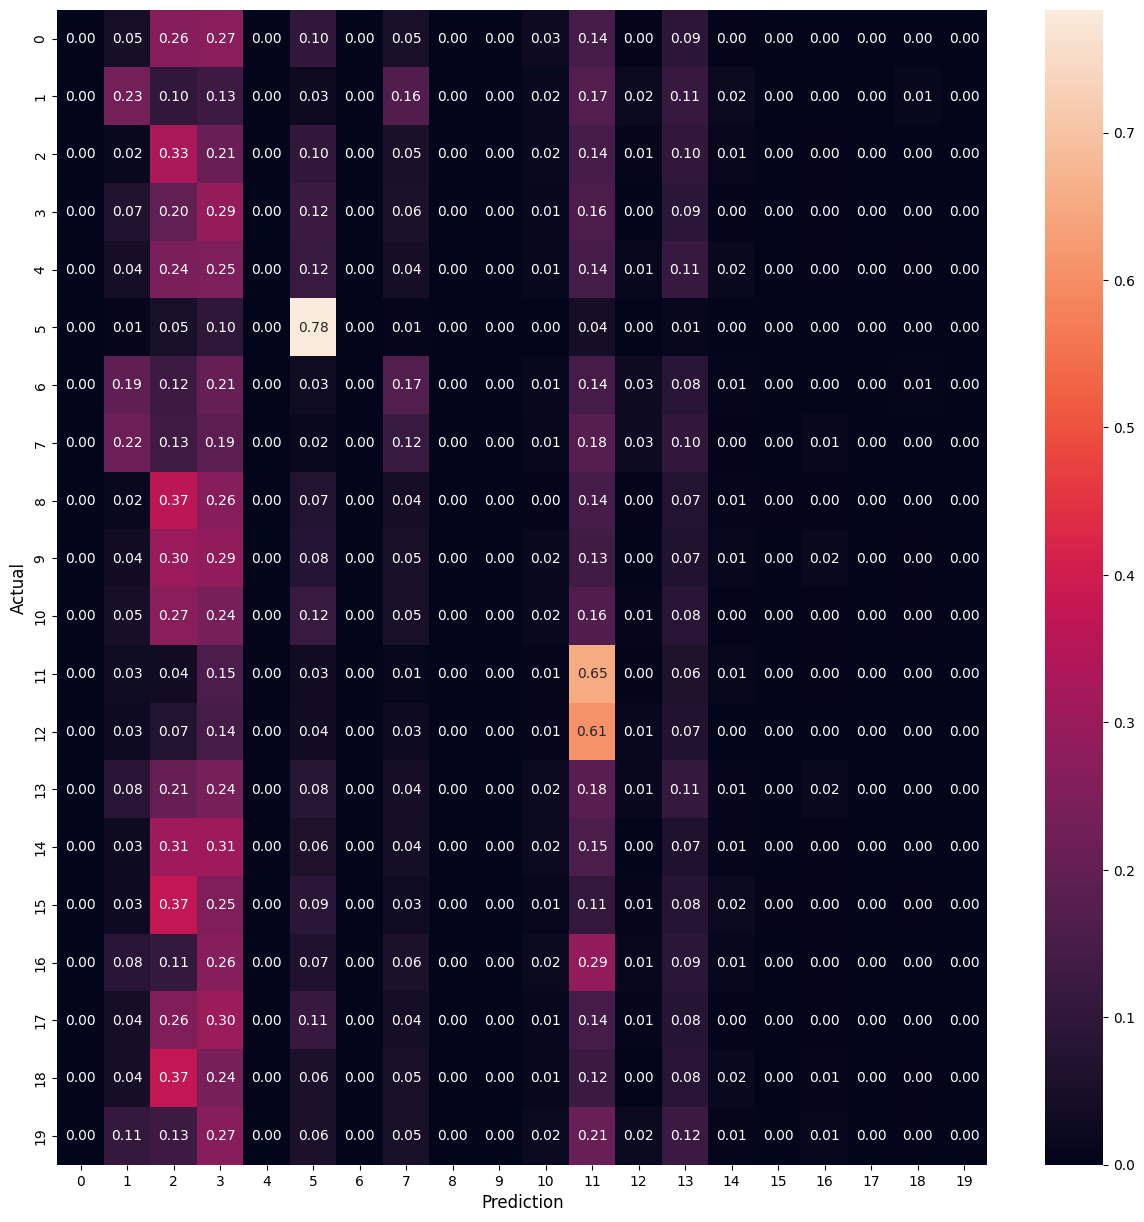

In [ ]:
confusion_matrix = metrics.confusion_matrix(np.argmax(y_test, axis =1), prediction)
confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_matrix_norm,
            annot=True,
            fmt='.2f',
            xticklabels=range(20),
            yticklabels=range(20))

# display matrix

plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.show()

## Bidirectional RNN Model [Bidirectional LSTM] for All 20 labels

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, SimpleRNN, Bidirectional

# def RNN_classifier(input_shape, num_classes):
model2 = Sequential()

model2.add(Embedding(input_dim=len(word_index_dict),output_dim=64,input_length=20))
model2.add(Bidirectional(LSTM(units = 128, return_sequences=True)))

model2.add(Bidirectional(LSTM(units=64)))
model2.add(Dropout(0.3))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dropout(0.3))
# model2.add(Dense(units=64, activation='relu'))
# model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=20, activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 64)            2116288   
                                                                 
 bidirectional_8 (Bidirecti  (None, 20, 256)           197632    
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dropout_11 (Dropout)        (None, 32)               

### Training

In [ ]:
# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model2.fit(word_index_list, y_train, epochs=10, batch_size=64, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

Epoch 1/10
300/300 [==============================] - 18s 38ms/step - loss: 2.9438 - accuracy: 0.0803 - val_loss: 2.8215 - val_accuracy: 0.1437
Epoch 2/10
300/300 [==============================] - 5s 18ms/step - loss: 2.7460 - accuracy: 0.1624 - val_loss: 2.7040 - val_accuracy: 0.1719
Epoch 3/10
300/300 [==============================] - 4s 14ms/step - loss: 2.4622 - accuracy: 0.2293 - val_loss: 2.7370 - val_accuracy: 0.1762
Epoch 4/10
300/300 [==============================] - 5s 16ms/step - loss: 2.1320 - accuracy: 0.3094 - val_loss: 2.8780 - val_accuracy: 0.1742
Epoch 5/10
300/300 [==============================] - 4s 12ms/step - loss: 1.7908 - accuracy: 0.4207 - val_loss: 3.1593 - val_accuracy: 0.1806


### Evaluation

In [ ]:
loss, accuracy = model2.evaluate(word_index_list_TEST, y_test)

188/188 [==============================] - 2s 6ms/step - loss: 2.7332 - accuracy: 0.1682


In [ ]:
prediction = np.argmax(model2.predict(word_index_list_TEST), axis=1)

188/188 [==============================] - 2s 5ms/step


In [ ]:
from sklearn.metrics import f1_score
f1_scores = f1_score(np.argmax(y_test, axis=1), prediction, average=None)
for label, f1 in enumerate(f1_scores):
  print(f"F1-score for label {label}: {f1}")

F1-score for label 0: 0.006079027355623101
F1-score for label 1: 0.24533333333333335
F1-score for label 2: 0.008676789587852493
F1-score for label 3: 0.15482954545454544
F1-score for label 4: 0.005555555555555556
F1-score for label 5: 0.7067137809187278
F1-score for label 6: 0.14959349593495935
F1-score for label 7: 0.1100196463654224
F1-score for label 8: 0.14362657091561937
F1-score for label 9: 0.0339943342776204
F1-score for label 10: 0.0
F1-score for label 11: 0.40549828178694153
F1-score for label 12: 0.33432835820895523
F1-score for label 13: 0.0
F1-score for label 14: 0.12274368231046931
F1-score for label 15: 0.0
F1-score for label 16: 0.012944983818770227
F1-score for label 17: 0.029925187032418952
F1-score for label 18: 0.0
F1-score for label 19: 0.0


In [ ]:
report = classification_report(np.argmax(y_test, axis =1), prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       0.03      0.00      0.01       300\n           1       0.20      0.31      0.25       300\n           2       0.01      0.01      0.01       300\n           3       0.10      0.36      0.15       300\n           4       0.02      0.00      0.01       300\n           5       0.75      0.67      0.71       300\n           6       0.15      0.15      0.15       300\n           7       0.13      0.09      0.11       300\n           8       0.09      0.40      0.14       300\n           9       0.11      0.02      0.03       300\n          10       0.00      0.00      0.00       300\n          11       0.31      0.59      0.41       300\n          12       0.24      0.56      0.33       300\n          13       0.00      0.00      0.00       300\n          14       0.10      0.17      0.12       300\n          15       0.00      0.00      0.00       300\n          16       0.22      0.01      0.01       300\n       

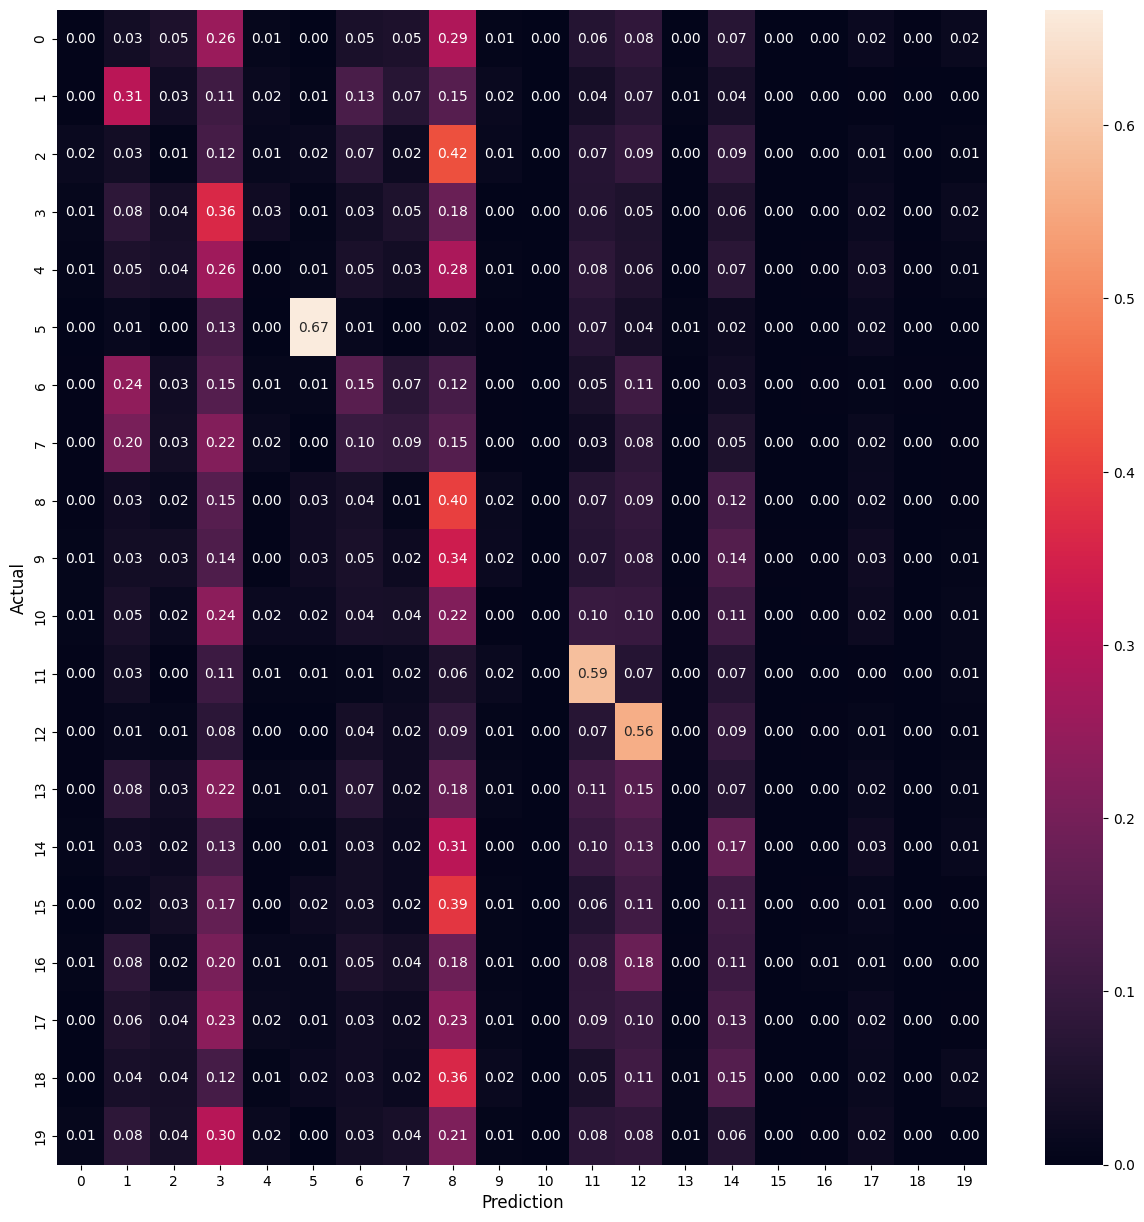

In [ ]:
confusion_matrix = metrics.confusion_matrix(np.argmax(y_test, axis =1), prediction)
confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(confusion_matrix_norm,
            annot=True,
            fmt='.2f',
            xticklabels=range(20),
            yticklabels=range(20))

# display matrix

plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, SimpleRNN, Bidirectional

# def RNN_classifier(input_shape, num_classes):
model2 = Sequential()

model2.add(Embedding(input_dim=len(word_index_dict),output_dim=64,input_length=20))
model2.add(Bidirectional(LSTM(units = 128, return_sequences=True)))

model2.add(Bidirectional(LSTM(units=64)))
model2.add(Dropout(0.5))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dropout(0.5))
# model2.add(Dense(units=64, activation='relu'))
# model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=20, activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 64)            2116288   
                                                                 
 bidirectional_6 (Bidirecti  (None, 20, 256)           197632    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dropout_9 (Dropout)         (None, 32)               

# Task 2 - Training Result with BERT vs RNN (Bidirectional) model

## DistilBert Model for Top 5 labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Google Drive version
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Project/Train.csv").drop(columns=['Unnamed: 0'])

Mounted at /content/drive


Back to data preprocessing before running the code below:

Run the first code box of undersampling for 20 classes to obtain the data

In [ ]:
def top5_subset_of_data(dfx, dfy):
  unique_classes = dfy.iloc[:,-1].value_counts().head(5).index.tolist()
  balanced_data = []
  balanced_label = []
  for label in unique_classes:
    class_indices = np.where(dfy == label)[0]
    balanced_data.append(dfx.iloc[class_indices[:3800]])
    balanced_label.append(dfy.iloc[class_indices[:3800]])
  balanced_data = pd.concat(balanced_data)
  balanced_label = pd.concat(balanced_label)
  return balanced_data, balanced_label

balanced_top5data, balanced_top5label = top5_subset_of_data(text_df, label_df)
t5X_train, t5X_test, t5y_train, t5y_test = train_test_split(balanced_top5data, balanced_top5label, test_size=0.2, stratify=balanced_top5label, random_state=4211)

# preprocess
t5X_train = t5X_train["TEXT"].apply(lambda x: remove_stopwords(remove_spl_chars(remove_punctuations(remove_url(x.lower())))))

In [ ]:
! pip install transformers

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, DistilBertTokenizerFast
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizerFast'.


In [ ]:
# Tokenize all the sentence
data = [sentence for sentence in t5X_train]
encoded_input = tokenizer(data,padding=True,truncation=True, return_tensors='pt')
input_ids = encoded_input["input_ids"]
attention_mask = encoded_input["attention_mask"]

In [ ]:
# Safe limit of preventing out of RAM
batch_size = 400

# Generate all the output of sentence from BERT transformer
bert_list = []
for i in range(0,input_ids.numpy().shape[0],batch_size):
  bert_output = bert(input_ids=input_ids[i:i+batch_size], attention_mask=attention_mask[i:i+batch_size])[0]
  # Reshape from 3D to 2D
  bert_output = bert_output.detach().numpy().reshape(batch_size,-1)
  bert_list.append(bert_output)

In [ ]:
# Concatenate all processed vector and store
result = np.concatenate(bert_list,axis=0)
# In case the environment accidentally shut down, no need to tokenized again
np.save('/content/drive/MyDrive/Project/t5bert.npy',result)

In [ ]:
result = np.load('/content/drive/MyDrive/Project/t5bert.npy')

In [ ]:
# Process the label to onehot encoding
t5y_train = to_categorical(t5y_train)

In [ ]:
# Model training for all BERT input to classifier
model3 = Sequential()
model3.add(Dropout(0.3))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(units=32, activation='relu'))
model3.add(Dropout(0.3))
# In total 5 classes only, but the original greatest label is 15
model3.add(Dense(units=16, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(result, t5y_train, validation_split=0.2, epochs=5, batch_size=128, callbacks=[early_stopping])

Epoch 1/5
95/95 [==============================] - 5s 15ms/step - loss: 2.1589 - accuracy: 0.2453 - val_loss: 1.5651 - val_accuracy: 0.3579
Epoch 2/5
95/95 [==============================] - 1s 8ms/step - loss: 1.6679 - accuracy: 0.3336 - val_loss: 1.4377 - val_accuracy: 0.3852
Epoch 3/5
95/95 [==============================] - 1s 7ms/step - loss: 1.5061 - accuracy: 0.3781 - val_loss: 1.4086 - val_accuracy: 0.4026
Epoch 4/5
95/95 [==============================] - 1s 8ms/step - loss: 1.3976 - accuracy: 0.4221 - val_loss: 1.4047 - val_accuracy: 0.3885
Epoch 5/5
95/95 [==============================] - 1s 8ms/step - loss: 1.3182 - accuracy: 0.4577 - val_loss: 1.4046 - val_accuracy: 0.3855


In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 24576)             0         
                                                                 
 dense (Dense)               (None, 128)               3145856   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [ ]:
# further training
model3.fit(result, t5y_train, validation_split=0.2, epochs=5, batch_size=128, callbacks=[early_stopping])

Epoch 1/5
95/95 [==============================] - 1s 12ms/step - loss: 1.2477 - accuracy: 0.4922 - val_loss: 1.4939 - val_accuracy: 0.3609
Epoch 2/5
95/95 [==============================] - 1s 8ms/step - loss: 1.2020 - accuracy: 0.5129 - val_loss: 1.4451 - val_accuracy: 0.4003
Epoch 3/5
95/95 [==============================] - 1s 7ms/step - loss: 1.1343 - accuracy: 0.5437 - val_loss: 1.4825 - val_accuracy: 0.3852
Epoch 4/5
95/95 [==============================] - 1s 7ms/step - loss: 1.0804 - accuracy: 0.5674 - val_loss: 1.5133 - val_accuracy: 0.3859
Epoch 5/5
95/95 [==============================] - 1s 8ms/step - loss: 1.0184 - accuracy: 0.5998 - val_loss: 1.5772 - val_accuracy: 0.3826


In [ ]:
# further training
model3.fit(result, t5y_train, validation_split=0.2, epochs=5, batch_size=128, callbacks=[early_stopping])

Epoch 1/5
95/95 [==============================] - 1s 12ms/step - loss: 1.1279 - accuracy: 0.5462 - val_loss: 1.4404 - val_accuracy: 0.3947
Epoch 2/5
95/95 [==============================] - 1s 8ms/step - loss: 1.0627 - accuracy: 0.5812 - val_loss: 1.5267 - val_accuracy: 0.3914
Epoch 3/5
95/95 [==============================] - 1s 8ms/step - loss: 1.0288 - accuracy: 0.5928 - val_loss: 1.5417 - val_accuracy: 0.3816
Epoch 4/5
95/95 [==============================] - 1s 8ms/step - loss: 0.9858 - accuracy: 0.6162 - val_loss: 1.6405 - val_accuracy: 0.3720


In [ ]:
# Preparing Test set
testX = t5X_test["TEXT"].apply(lambda x: remove_stopwords(remove_spl_chars(remove_punctuations(remove_url(x.lower())))))
dataX = [sentence for sentence in testX]
encoded_inputX = tokenizer(dataX,padding='max_length',return_tensors='pt',max_length=int(result.shape[-1]/768))

In [ ]:
encoded_inputX["input_ids"].shape

torch.Size([3800, 32])

In [ ]:
inputX_ids = encoded_inputX["input_ids"]
attentionX_mask = encoded_inputX["attention_mask"]
batch_size = 190
bert_list = []
for i in range(0,inputX_ids.numpy().shape[0],batch_size):
  bert_output = bert(input_ids=inputX_ids[i:i+batch_size], attention_mask=attentionX_mask[i:i+batch_size])[0]
  bert_output = bert_output.detach().numpy().reshape(batch_size,-1)
  bert_list.append(bert_output)
test = np.concatenate(bert_list,axis=0)

In [ ]:
t5y_test = to_categorical(t5y_test)

In [ ]:
model3.evaluate(result,t5y_train)

475/475 [==============================] - 1s 3ms/step - loss: 1.0282 - accuracy: 0.6094


[1.02823805809021, 0.609407901763916]

In [ ]:
model3.evaluate(test,t5y_test)

119/119 [==============================] - 0s 3ms/step - loss: 1.4378 - accuracy: 0.4005


[1.437790870666504, 0.4005263149738312]

In [ ]:
from sklearn.metrics import f1_score
prediction = np.argmax(model3.predict(test), axis=1)
# print(prediction)
true_labels = np.argmax(t5y_test,axis=1)
f1_scores = f1_score(np.argmax(t5y_test,axis=1), prediction, average=None)

for label, f1 in enumerate(f1_scores):
  print(f"F1-score for label {label}: {f1}")

119/119 [==============================] - 0s 2ms/step
F1-score for label 0: 0.35659824046920824
F1-score for label 1: 0.49048913043478265
F1-score for label 2: 0.5264499681325685
F1-score for label 3: 0.24271079590228525
F1-score for label 4: 0.3659305993690852


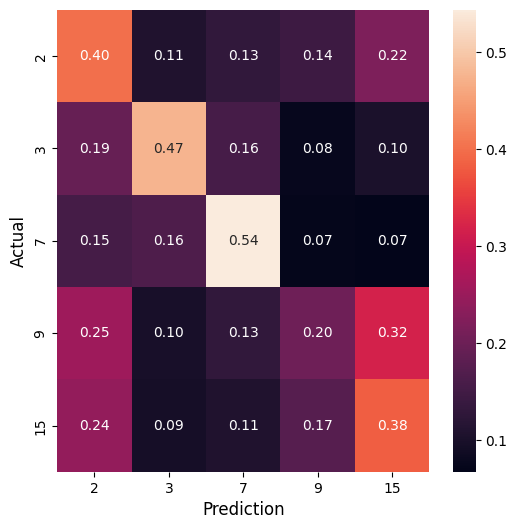

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
confusion_matrix = metrics.confusion_matrix(np.argmax(t5y_test,axis=1), prediction)
confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix_norm,
            annot=True,
            fmt='.2f',
            xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))

# display matrix

plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.show()

## RNN Model [Bidirectional LSTM] for Top 5 labels

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, SimpleRNN, Bidirectional

# def RNN_classifier(input_shape, num_classes):
model4 = Sequential()

model4.add(Embedding(input_dim=len(word_index_dict),output_dim=64,input_length=20))
model4.add(Bidirectional(LSTM(units = 128, return_sequences=True)))

model4.add(Bidirectional(LSTM(units=64)))
model4.add(Dropout(0.3))
model4.add(Dense(units=32, activation='relu'))
model4.add(Dropout(0.3))
# model4.add(Dense(units=64, activation='relu'))
# model4.add(Dense(units=32, activation='relu'))
model4.add(Dense(units=y_train.shape[1], activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 64)            1516544   
                                                                 
 bidirectional_2 (Bidirecti  (None, 20, 256)           197632    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

### Training

In [ ]:
# Compile the model
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model4.fit(word_index_list, y_train, epochs=10, batch_size=64, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

Epoch 1/10
190/190 [==============================] - 37s 117ms/step - loss: 1.8763 - accuracy: 0.2123 - val_loss: 1.5393 - val_accuracy: 0.3141
Epoch 2/10
190/190 [==============================] - 4s 21ms/step - loss: 1.4958 - accuracy: 0.3319 - val_loss: 1.4316 - val_accuracy: 0.3431
Epoch 3/10
190/190 [==============================] - 4s 21ms/step - loss: 1.2521 - accuracy: 0.4537 - val_loss: 1.4386 - val_accuracy: 0.3651
Epoch 4/10
190/190 [==============================] - 4s 20ms/step - loss: 0.9844 - accuracy: 0.5894 - val_loss: 1.7103 - val_accuracy: 0.3520
Epoch 5/10
190/190 [==============================] - 3s 17ms/step - loss: 0.7163 - accuracy: 0.6925 - val_loss: 1.9465 - val_accuracy: 0.3717


### Evaluation

In [ ]:
loss, accuracy = model4.evaluate(word_index_list_TEST, y_test)

119/119 [==============================] - 1s 8ms/step - loss: 1.4228 - accuracy: 0.3621


In [ ]:
prediction = np.argmax(model4.predict(word_index_list_TEST), axis=1)

119/119 [==============================] - 1s 4ms/step


In [ ]:
np.argmax(y_test, axis=1)

array([7, 3, 2, ..., 7, 9, 2])

In [ ]:
prediction

array([ 7,  2,  3, ...,  7, 15, 15])

In [ ]:
from sklearn.metrics import f1_score
f1_scores = f1_score(np.argmax(y_test, axis=1), prediction, average=None)
top_5_labels.sort()
for f1, label in zip(f1_scores,top_5_labels):
  print(f"F1-score for label {label}: {f1}")

F1-score for label 2: 0.2351313969571231
F1-score for label 3: 0.3466995681677976
F1-score for label 7: 0.5792141951837769
F1-score for label 9: 0.010191082802547772
F1-score for label 15: 0.42764976958525347


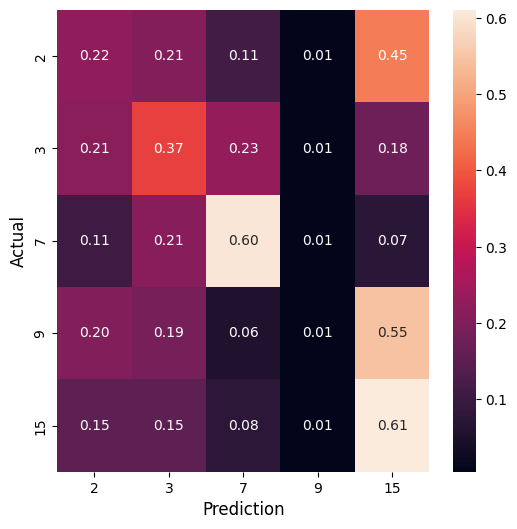

In [ ]:
confusion_matrix = metrics.confusion_matrix(np.argmax(y_test, axis =1), prediction)
confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix_norm,
            annot=True,
            fmt='.2f',
            xticklabels= top_5_labels,
            yticklabels= top_5_labels)

# display matrix

plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.show()

# Task 3: RNN (Bidrectional) with All 20 Labels vs. Top 5 Labels

No new model need to be built, Please refer to
*   model2 from Task 1[All 20 labels]
*   model5 from Task 2 [Top 5 labels]

# Task 4: RNN (Bidrectional) on Emoji Prediction Dataset vs. Other Dataset

## RNN Model [Bidirectional LSTM] for other dataset ag_news

In [ ]:
# Try another datasets for code testing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, SimpleRNN, Bidirectional

# def RNN_classifier(input_shape, num_classes):
model5 = Sequential()

model5.add(Embedding(input_dim=len(word_index_dict),output_dim=64,input_length=75))
model5.add(Bidirectional(LSTM(units = 128, return_sequences=True)))

model5.add(Bidirectional(LSTM(units=64)))
model5.add(Dropout(0.3))
model5.add(Dense(units=32, activation='relu'))
model5.add(Dropout(0.3))
# model2.add(Dense(units=64, activation='relu'))
# model2.add(Dense(units=32, activation='relu'))
model5.add(Dense(units=4, activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 75, 64)            919616    
                                                                 
 bidirectional (Bidirection  (None, 75, 256)           197632    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

### Training

In [ ]:
# Compile the model
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model5.fit(word_index_list, y_train, epochs=10, batch_size=64, validation_split=0.2, shuffle=True, callbacks=[early_stopping])

Epoch 1/10
60/60 [==============================] - 22s 213ms/step - loss: 1.2088 - accuracy: 0.4378 - val_loss: 0.6137 - val_accuracy: 0.8115
Epoch 2/10
60/60 [==============================] - 7s 109ms/step - loss: 0.4212 - accuracy: 0.8828 - val_loss: 0.4686 - val_accuracy: 0.8490
Epoch 3/10
60/60 [==============================] - 13s 208ms/step - loss: 0.1983 - accuracy: 0.9552 - val_loss: 0.5441 - val_accuracy: 0.8375
Epoch 4/10
60/60 [==============================] - 7s 115ms/step - loss: 0.1175 - accuracy: 0.9729 - val_loss: 0.6484 - val_accuracy: 0.8333
Epoch 5/10
60/60 [==============================] - 6s 103ms/step - loss: 0.0717 - accuracy: 0.9862 - val_loss: 0.6984 - val_accuracy: 0.8490


### Evaluation

In [ ]:
loss, accuracy = model5.evaluate(word_index_list_TEST, y_test)

38/38 [==============================] - 3s 13ms/step - loss: 0.4752 - accuracy: 0.8467


In [ ]:
prediction = np.argmax(model5.predict(word_index_list_TEST), axis=1)

38/38 [==============================] - 2s 9ms/step


In [ ]:
from sklearn.metrics import f1_score
f1_scores = f1_score(np.argmax(y_test, axis=1), prediction, average=None)
for label, f1 in enumerate(f1_scores):
  print(f"F1-score for label {label}: {f1}")

F1-score for label 0: 0.8286713286713286
F1-score for label 1: 0.8969072164948454
F1-score for label 2: 0.8304278922345482
F1-score for label 3: 0.832520325203252


In [ ]:
report = classification_report(np.argmax(y_test, axis =1), prediction)

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       0.87      0.79      0.83       300\n           1       0.93      0.87      0.90       300\n           2       0.79      0.87      0.83       300\n           3       0.81      0.85      0.83       300\n\n    accuracy                           0.85      1200\n   macro avg       0.85      0.85      0.85      1200\nweighted avg       0.85      0.85      0.85      1200\n'

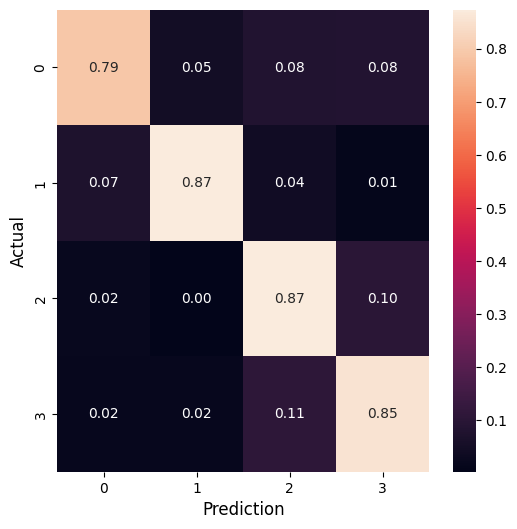

In [ ]:
confusion_matrix = metrics.confusion_matrix(np.argmax(y_test, axis =1), prediction)
confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix_norm,
            annot=True,
            fmt='.2f',
            xticklabels=range(4),
            yticklabels=range(4))

# display matrix

plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.show()

# Technique Discussion

## Discussion 1 - EmoBert Model

Run the top 4 code box until early stopping in task 2 DistilBert model

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# loading EmoBert model and tokenizer
tokenizer_emo = AutoTokenizer.from_pretrained("bhadresh-savani/bert-base-uncased-emotion")
emobert = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/bert-base-uncased-emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
data = [sentence for sentence in t5X_train]
encoded_input = tokenizer_emo(data,padding=True,truncation=True, return_tensors='pt')
emoinput_ids = encoded_input["input_ids"]
emoattention_mask = encoded_input["attention_mask"]

In [ ]:
# Generate all emobert output
batch_size = 400
emobert_list = []
for i in range(0,emoinput_ids.numpy().shape[0],batch_size):
  emobert_output = emobert(input_ids=emoinput_ids[i:i+batch_size], attention_mask=emoattention_mask[i:i+batch_size])[0]
  emobert_output = emobert_output.detach().numpy().reshape(batch_size,-1)
  emobert_list.append(emobert_output)

In [ ]:
emo_result = np.concatenate(emobert_list,axis=0)

In [ ]:
np.save('/content/drive/MyDrive/Project/emobert.npy',emo_result)

In [ ]:
emo_result = np.load('/content/drive/MyDrive/Project/emobert.npy')

In [ ]:
t5y_train = to_categorical(t5y_train)

In [ ]:
# model for training emoBERT processing data
emo_model = Sequential()
emo_model.add(Dropout(0.3))
emo_model.add(Dense(units=128, activation='relu'))
emo_model.add(Dense(units=64, activation='relu'))
emo_model.add(Dropout(0.3))
emo_model.add(Dense(units=32, activation='relu'))
emo_model.add(Dropout(0.3))
emo_model.add(Dense(units=16, activation='softmax'))
emo_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
emo_model.fit(emo_result, t5y_train, validation_split=0.2, epochs=5, batch_size=128, callbacks=[early_stopping])

Epoch 1/5
95/95 [==============================] - 4s 6ms/step - loss: 2.0019 - accuracy: 0.2127 - val_loss: 1.6213 - val_accuracy: 0.2766
Epoch 2/5
95/95 [==============================] - 0s 4ms/step - loss: 1.7060 - accuracy: 0.2291 - val_loss: 1.5805 - val_accuracy: 0.2812
Epoch 3/5
95/95 [==============================] - 0s 4ms/step - loss: 1.6368 - accuracy: 0.2400 - val_loss: 1.5671 - val_accuracy: 0.2931
Epoch 4/5
95/95 [==============================] - 0s 4ms/step - loss: 1.6079 - accuracy: 0.2581 - val_loss: 1.5647 - val_accuracy: 0.2770
Epoch 5/5
95/95 [==============================] - 0s 4ms/step - loss: 1.5911 - accuracy: 0.2535 - val_loss: 1.5614 - val_accuracy: 0.2967


In [ ]:
# further training
emo_model.fit(emo_result, t5y_train, validation_split=0.2, epochs=5, batch_size=128, callbacks=[early_stopping])

Epoch 1/5
95/95 [==============================] - 0s 4ms/step - loss: 1.5859 - accuracy: 0.2554 - val_loss: 1.5593 - val_accuracy: 0.2845
Epoch 2/5
95/95 [==============================] - 0s 4ms/step - loss: 1.5837 - accuracy: 0.2529 - val_loss: 1.5615 - val_accuracy: 0.2944
Epoch 3/5
95/95 [==============================] - 0s 4ms/step - loss: 1.5816 - accuracy: 0.2647 - val_loss: 1.5587 - val_accuracy: 0.2885
Epoch 4/5
95/95 [==============================] - 0s 4ms/step - loss: 1.5809 - accuracy: 0.2547 - val_loss: 1.5594 - val_accuracy: 0.2816
Epoch 5/5
95/95 [==============================] - 0s 3ms/step - loss: 1.5755 - accuracy: 0.2590 - val_loss: 1.5608 - val_accuracy: 0.2671


In [ ]:
# further training
emo_model.fit(emo_result, t5y_train, validation_split=0.2, epochs=5, batch_size=128, callbacks=[early_stopping])

Epoch 1/5
95/95 [==============================] - 0s 4ms/step - loss: 1.5733 - accuracy: 0.2631 - val_loss: 1.5578 - val_accuracy: 0.2806
Epoch 2/5
95/95 [==============================] - 0s 4ms/step - loss: 1.5731 - accuracy: 0.2628 - val_loss: 1.5563 - val_accuracy: 0.2888
Epoch 3/5
95/95 [==============================] - 0s 4ms/step - loss: 1.5739 - accuracy: 0.2576 - val_loss: 1.5582 - val_accuracy: 0.2852
Epoch 4/5
95/95 [==============================] - 0s 4ms/step - loss: 1.5672 - accuracy: 0.2679 - val_loss: 1.5547 - val_accuracy: 0.2780
Epoch 5/5
95/95 [==============================] - 0s 4ms/step - loss: 1.5718 - accuracy: 0.2691 - val_loss: 1.5587 - val_accuracy: 0.2809


In [ ]:
emo_model.evaluate(emo_result,t5y_train)

475/475 [==============================] - 1s 2ms/step - loss: 1.5463 - accuracy: 0.2956


[1.5463476181030273, 0.2955920994281769]

In [ ]:
# Preparing Test set
t5testX = t5X_test["TEXT"].apply(lambda x: remove_stopwords(remove_spl_chars(remove_punctuations(remove_url(x.lower())))))
t5dataX = [sentence for sentence in t5testX]
t5encoded_inputX = tokenizer_emo(t5dataX,padding='max_length',truncation=True,return_tensors='pt',max_length=32)
t5inputX_ids = t5encoded_inputX["input_ids"]
t5attentionX_mask = t5encoded_inputX["attention_mask"]
# Generate all emobert output
batch_size = 475
emobert_list = []
for i in range(0,t5inputX_ids.numpy().shape[0],batch_size):
  emobert_output = emobert(input_ids=t5inputX_ids[i:i+batch_size], attention_mask=t5attentionX_mask[i:i+batch_size])[0]
  emobert_output = emobert_output.detach().numpy().reshape(batch_size,-1)
  emobert_list.append(emobert_output)
emo_testresult = np.concatenate(emobert_list,axis=0)
t5y_test = to_categorical(t5y_test)

In [ ]:
emo_model.evaluate(emo_testresult,t5y_test)

119/119 [==============================] - 0s 2ms/step - loss: 1.5458 - accuracy: 0.2811


[1.545788288116455, 0.2810526192188263]

In [ ]:
from sklearn.metrics import f1_score
prediction = np.argmax(emo_model.predict(emo_testresult), axis=1)
# print(prediction)
true_labels = np.argmax(t5y_test,axis=1)
f1_scores = f1_score(np.argmax(t5y_test,axis=1), prediction, average=None)

for label, f1 in enumerate(f1_scores):
  print(f"F1-score for label {label}: {f1}")

119/119 [==============================] - 0s 1ms/step
F1-score for label 0: 0.17413355874894335
F1-score for label 1: 0.2742653606411398
F1-score for label 2: 0.3708318065225357
F1-score for label 3: 0.00522875816993464
F1-score for label 4: 0.33666666666666667


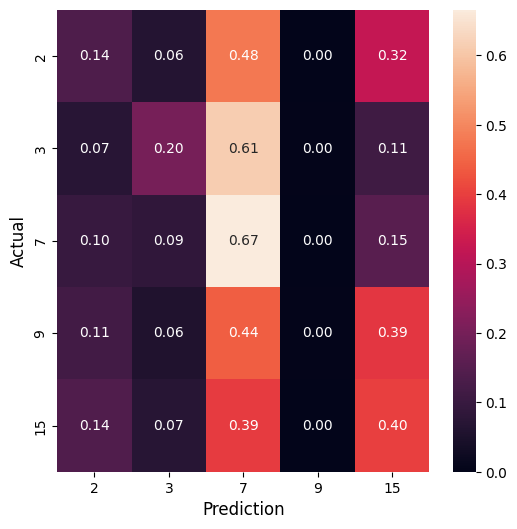

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
confusion_matrix = metrics.confusion_matrix(np.argmax(t5y_test,axis=1), prediction)
confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix_norm,
            annot=True,
            fmt='.2f',
            xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))

# display matrix

plt.ylabel('Actual',fontsize=12)
plt.xlabel('Prediction',fontsize=12)
plt.show()